In [43]:
from ase.io.trajectory import Trajectory
from ase.io.trajectory import TrajectoryReader
from ase.visualize import view
from ase import Atoms
import numpy as np
import math
import matplotlib.cm as cm
from matplotlib.colors import PowerNorm



import ipynb
from ipynb.fs.full.Abtem_lib import *


import matplotlib.pyplot as plt


from tqdm.auto import tqdm  # notebook compatible

# from ase.lattice.spacegroup import crystal
from ase.spacegroup import crystal
from abtem.visualize import show_atoms
from ase.io import read
from ase.visualize import view
from ase import Atoms
from abtem.parametrizations import LobatoParametrization

from mp_api.client import MPRester
from IPython.display import HTML

In [17]:
traj = Trajectory('full-relax-n-1-m-4.traj')
traj_5 = Trajectory('full-relax-n-1-m-5.traj')

# Functions

In [10]:
def gen_stack_from_trajectory(ase_traj, sliceThickness = 0.5, resolution = 0.5, save_potentials = False, save_structures = False):
    """Function for getting data from many layers"""

    sampling_pam = sampling_parameters(ase_traj[0], energy = 300e3, resolution = resolution)
    #Make the ingoing plane wave:
    plane_wave = abtem.PlaneWave(energy =sampling_pam['energy'],
                                gpts = sampling_pam['gpts'],
                                extent = sampling_pam['extent'])




    #Generate labels for metadata:
    labels = ["trajectory # "]*len(ase_traj)

    for i , lab in enumerate(labels):
        labels[i] = lab + f'{i+1}'

    #Data saving lists
    ase_structures = []
    potentials = []    
    exit_waves = []

    for l, traj in enumerate(tqdm(ase_traj, desc ='Trajectory file:', leave=False)):
                
        if save_structures:
            ase_structures.append(traj)

        #build potential of new instance and add to list
        potential = potential_build(traj, 
                                    energy=sampling_pam['energy'], 
                                    slice_thickness = sliceThickness,
                                    projection="finite", 
                                    resolution=sampling_pam['resolution'],
                                    )
        if save_potentials:
            potentials.append(potential)

        #build exit wave and add to list
        exit_wave = TEM_exit_wave(potential, plane_wave)
        exit_waves.append(exit_wave)

             

    exit_wave_stack = abtem.stack(exit_waves, labels)
                       
    metadata = {'ASE structure' : ase_structures, 'Potential' : potentials}
        


    return exit_wave_stack, metadata

# image generation

In [ ]:
Traj_fewer = []
index = 0
while index < len(traj):
    Traj_fewer.append(traj[index])
    index += 5
len(Traj_fewer)

33

In [21]:
view(traj[0])

<Popen: returncode: None args: ['c:\\Users\\Bruger\\anaconda3\\envs\\moire_c...>

In [11]:
sampling_parameters(traj[0], energy=300000)

{'energy': 300000,
 'resolution': 1,
 'extent': 16.10072747,
 'Pixel size': 0.25157386671875,
 'gpts': 64,
 'Wavelength': 0.01968748889772767,
 'Reciprocal pixel size': 0.062109,
 'k_max nyquist': 1.987488,
 'k_max antialiasing': 1.324992,
 'Angular limitied resolution': 26.08576528957798}

In [12]:
data_, metadata = gen_stack_from_trajectory(ase_traj = traj , sliceThickness=1)

Trajectory file::   0%|          | 0/161 [00:00<?, ?it/s]

[########################################] | 100% Completed | 2.65 ss
[########################################] | 100% Completed | 1.11 ss
[########################################] | 100% Completed | 1.16 ss
[########################################] | 100% Completed | 1.11 ss
[########################################] | 100% Completed | 1.01 ss
[########################################] | 100% Completed | 1.32 ss
[########################################] | 100% Completed | 1.32 ss
[########################################] | 100% Completed | 1.32 ss
[########################################] | 100% Completed | 1.22 ss
[########################################] | 100% Completed | 1.13 ss
[########################################] | 100% Completed | 1.12 ss
[########################################] | 100% Completed | 1.11 ss
[########################################] | 100% Completed | 1.12 ss
[########################################] | 100% Completed | 1.12 ss
[###################

In [18]:
data_5, metadata_5 = gen_stack_from_trajectory(ase_traj = traj_5 , sliceThickness=1)

Trajectory file::   0%|          | 0/144 [00:00<?, ?it/s]

[########################################] | 100% Completed | 1.25 ss
[########################################] | 100% Completed | 1.12 ss
[########################################] | 100% Completed | 1.12 ss
[########################################] | 100% Completed | 1.11 ss
[########################################] | 100% Completed | 1.32 ss
[########################################] | 100% Completed | 1.32 ss
[########################################] | 100% Completed | 1.34 ss
[########################################] | 100% Completed | 1.12 ss
[########################################] | 100% Completed | 1.01 ss
[########################################] | 100% Completed | 1.01 ss
[########################################] | 100% Completed | 1.11 ss
[########################################] | 100% Completed | 1.01 ss
[########################################] | 100% Completed | 1.12 ss
[########################################] | 100% Completed | 1.12 ss
[###################

In [88]:
filename_1 = 'full-relax-n-1-m-4'
filename_2 = 'full-relax-n-1-m-5'

save_outcome(data_, filename_1)
save_outcome(data_5,filename_2)

[########################################] | 100% Completed | 103.60 ms
File has been saved to disk at directory:
 c:\Users\Bruger\Desktop\Python\Moire\moire_visualization\SrTiO3DFT\data\full-relax-n-1-m-4
[########################################] | 100% Completed | 103.47 ms
File has been saved to disk at directory:
 c:\Users\Bruger\Desktop\Python\Moire\moire_visualization\SrTiO3DFT\data\full-relax-n-1-m-5


# Plotting

In [13]:
%matplotlib inline

In [14]:
%matplotlib ipympl

In [25]:
data_.show(interact=True, cbar= True)
data_5.show(interact=True, cbar= True)

ImageGUI(children=(VBox(children=(SelectionSlider(continuous_update=False, options=('trajectory # 1', 'traject…

ImageGUI(children=(VBox(children=(SelectionSlider(continuous_update=False, options=('trajectory # 1', 'traject…

In [ ]:
data_5.show(interact=True, cbar= True)

In [87]:
data_.diffraction_patterns().show(interact = True, cbar = True)
data_5.diffraction_patterns().show(interact = True, cbar = True )

ImageGUI(children=(VBox(children=(SelectionSlider(continuous_update=False, options=('trajectory # 1', 'traject…

ImageGUI(children=(VBox(children=(SelectionSlider(continuous_update=False, options=('trajectory # 1', 'traject…

## Rotation + translation image

## Trajectory image

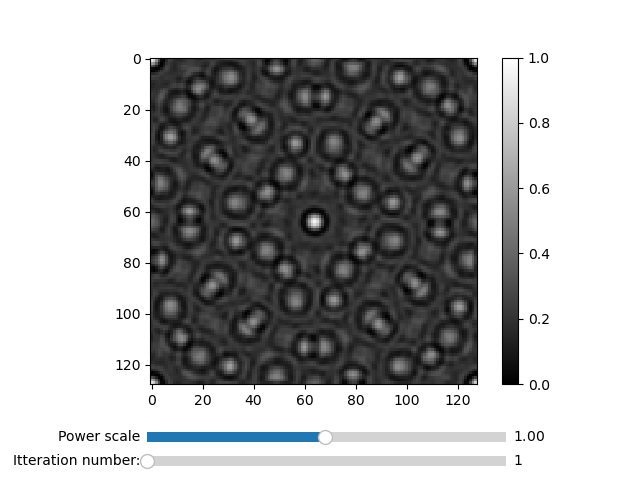

In [57]:
from matplotlib.widgets import Slider

data = data_.intensity().array
#create the array which can be plotted as powers

# current layer index start with the first layer 
idx = 0
Power_factor = 1

# figure axis setup 
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
# display initial image 
cmap = 'grey'
im_h = ax.imshow(data[idx, :, :], cmap=cmap, norm = PowerNorm(Power_factor), interpolation='nearest')


cb = fig.colorbar(cm.ScalarMappable( cmap=cmap, norm = PowerNorm(Power_factor) ), ax=ax)
# setup a slider axis and the Slider
diff = 0.05
ax_x = plt.axes([0.23, 0.02, 0.56, 0.04])
ax_power = plt.axes([0.23, 0.02+diff, 0.56, 0.04])


slider_x = Slider(ax_x, 'Itteration number:', 1, data.shape[0], valinit=idx, valstep = 1)
slider_power = Slider(ax_power, 'Power scale', 0.01, 2, valinit=Power_factor, valstep = 0.01)

# update the figure with a change on the slider 
def update_sliders(val):
    idx = int(round(slider_x.val))
    Power_factor = round(slider_power.val,2)
    cb.update_normal(cm.ScalarMappable( cmap=cmap, norm = PowerNorm(Power_factor) ))
    im_h.set_data(data[idx-1, :, :])
    im_h.norm = PowerNorm(Power_factor)
    


slider_x.on_changed(update_sliders)
slider_power.on_changed(update_sliders)



plt.show()

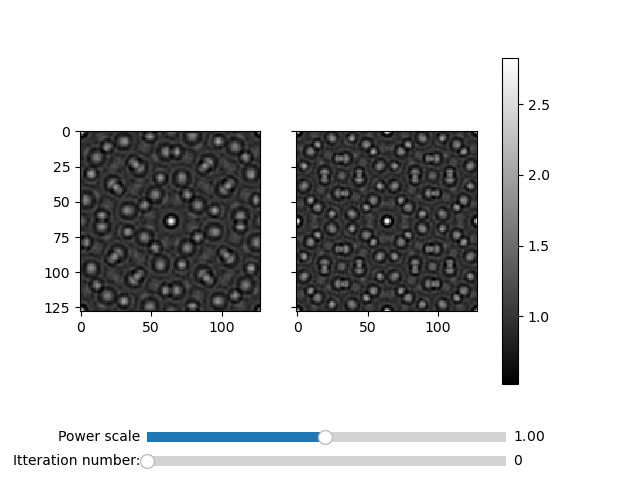

In [86]:
from matplotlib.widgets import Slider

data_1 = data_.intensity().array
data_2 = data_5.intensity().array
data = [data_1,data_2]
#create the array which can be plotted as powers

# current layer index start with the first layer 
idx = 0
Power_factor = 1

# figure axis setup 
fig, axes = plt.subplots(1,2, sharey= True)
fig.subplots_adjust(bottom=0.2)
# display initial image 
cmap = 'grey'

im_1 = axes[0].imshow(data_1[idx, :, :], cmap=cmap, norm = PowerNorm(Power_factor), interpolation='nearest')
im_2 = axes[1].imshow(data_2[idx, :, :], cmap=cmap, norm = PowerNorm(Power_factor), interpolation='nearest')

cb = fig.colorbar(im_2, ax=axes)
# setup a slider axis and the Slider
diff = 0.05
ax_x = plt.axes([0.23, 0.02, 0.56, 0.04])
ax_power = plt.axes([0.23, 0.02+diff, 0.56, 0.04])


slider_x = Slider(ax_x, 'Itteration number:', 0, data_1.shape[0], valinit=idx, valstep = 1)
slider_power = Slider(ax_power, 'Power scale', 0.01, 2, valinit=Power_factor, valstep = 0.01)

# update the figure with a change on the slider 
def update_sliders(val):
    idx = int(round(slider_x.val))
    Power_factor = round(slider_power.val,2)
    cb.update_normal(cm.ScalarMappable( cmap=cmap, norm = PowerNorm(Power_factor) ))

    
    im_1.set_data(data_1[idx-1, :, :])
    im_2.set_data(data_2[idx-1, :, :])
    im_1.norm = PowerNorm(Power_factor)
    im_2.norm = PowerNorm(Power_factor)
    


slider_x.on_changed(update_sliders)
slider_power.on_changed(update_sliders)



plt.show()